In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta, comb

In [ ]:
# Parameters
n, alpha, beta1, iterations = 16, 1, 1, 100000

In [ ]:
def gibbs_samp(n, alpha, beta, num_samples):
    # store samples
    samp_x = np.zeros(num_samples, dtype=int)
    samp_p = np.zeros(num_samples)

    # val for x and p
    x = np.random.randint(0, n+1)
    p = np.random.beta(alpha + x, n - x + beta)

    for i in range(num_samples):
        # Sample x from conditional distribution
        samp_x[i] = x

        # Sample p from conditional distribution
        p = np.random.beta(alpha + x, n - x + beta)
        samp_p[i] = p

        # Sample x from conditional distribution
        x = np.random.binomial(n, p)

    return samp_x

In [ ]:
#gibbs
samples_x = gibbs_samp(n, alpha, beta1, iterations)

In [ ]:
# exact prob list compr
exact_probs = [comb(n, x) * beta(x + alpha, n - x + beta1) for x in range(n+1)]

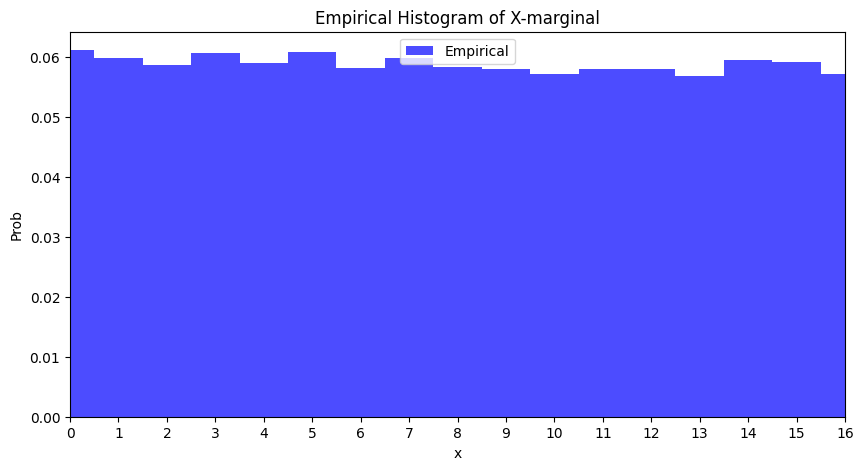

In [55]:
# Plot empirical histogram
plt.figure(figsize=(10, 5))
plt.hist(samples_x, bins=np.arange(n+2)-0.5, density=True, alpha=0.7, color='blue', label='Empirical')
plt.xlabel('x')
plt.ylabel('Prob')
plt.xlim(1,10)
plt.title('Empirical Histogram of X-marginal')
plt.xticks(np.arange(n+1))
plt.legend()

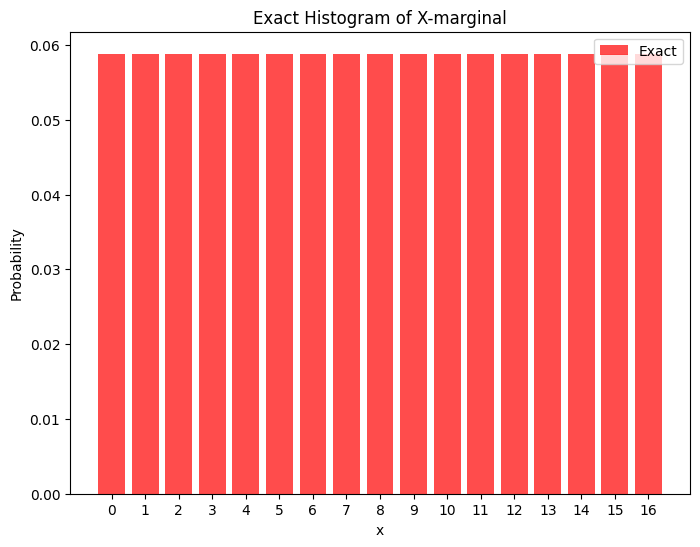

In [51]:
# Plot exact histogram
plt.figure(figsize=(8, 6))
plt.bar(range(n + 1), exact_probs, color='red', alpha=0.7, label='Exact')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Exact Histogram of X-marginal')
plt.xticks(np.arange(n + 1))
plt.legend()
plt.show()